In [1]:
import pickle
import os
import time
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import numpy as np
import datetime
from PIL import Image
from numpy import *
import matplotlib.pyplot as plt


In [2]:
NAME = f"cat_vs_dogs_4c2_2n{time.time()}"
tensorboard = TensorBoard(log_dir=f"logs\\{NAME}\\")

In [3]:
X = pickle.load(open("X.pkl", "rb"))
Y = pickle.load(open("Y.pkl", "rb"))


In [4]:
print(X[1][1][0])
#Image.fromarray(X[74],"RGB").show()

[220 205 195]


In [5]:
X=X/255  # nefunguje pro 300 x 300 

In [6]:
print(X[1][1][0])

[0.8627451  0.80392157 0.76470588]


1


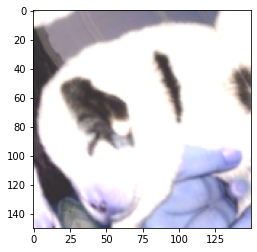

In [7]:
a =1
plt.imshow(X[a])
print(Y[a])

In [8]:
print(X.shape, Y.shape)
print(Y)
print(X[0])


(25000, 150, 150, 3) (25000,)
[1 1 0 ... 1 0 1]
[[[0.93333333 0.94117647 1.        ]
  [0.89803922 0.92941176 1.        ]
  [0.89803922 0.93333333 1.        ]
  ...
  [0.45098039 0.46666667 0.45490196]
  [0.45882353 0.4745098  0.4627451 ]
  [0.52156863 0.56078431 0.56862745]]

 [[0.96862745 0.98039216 1.        ]
  [0.9372549  0.96470588 1.        ]
  [0.91764706 0.94901961 1.        ]
  ...
  [0.4627451  0.4745098  0.46666667]
  [0.45490196 0.47058824 0.45882353]
  [0.49411765 0.53333333 0.54901961]]

 [[0.96078431 0.97647059 1.        ]
  [0.92941176 0.94901961 1.        ]
  [0.90980392 0.93333333 1.        ]
  ...
  [0.41568627 0.43137255 0.42352941]
  [0.43529412 0.45490196 0.45098039]
  [0.48235294 0.5254902  0.54509804]]

 ...

 [[0.78823529 0.83921569 0.99607843]
  [0.80392157 0.85490196 1.        ]
  [0.78039216 0.82745098 1.        ]
  ...
  [0.73333333 0.76078431 0.75686275]
  [0.73333333 0.75686275 0.75686275]
  [0.74509804 0.76078431 0.77647059]]

 [[0.8        0.85882353 1

In [9]:

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = X.shape[1:],  activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation= "relu"))
model.add(Dropout(0.5))

model.add(Dense(2, activation= "softmax"))


In [10]:
#opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#from tensorflow import keras
#model = keras.models.load_model(r'C:\Users\david\Desktop\kodezy\python\normalni_projekty\AI_2typesof images\done models\cat_vs_dogs_bigger_1649223531.978945_10epochs.h5')
#model.summary()

In [11]:
epochs = 40
model.fit(X, Y, epochs=epochs, validation_split=0.1, callbacks=tensorboard)

Epoch 1/40
704/704 [==============================] - 267s 289ms/step - loss: 0.6897 - accuracy: 0.5300 - val_loss: 0.6615 - val_accuracy: 0.5920
Epoch 2/40
704/704 [==============================] - 130s 185ms/step - loss: 0.6687 - accuracy: 0.5845 - val_loss: 0.6340 - val_accuracy: 0.6488
Epoch 3/40
704/704 [==============================] - 130s 185ms/step - loss: 0.6335 - accuracy: 0.6431 - val_loss: 0.6124 - val_accuracy: 0.6600
Epoch 4/40
704/704 [==============================] - 130s 185ms/step - loss: 0.6042 - accuracy: 0.6702 - val_loss: 0.5514 - val_accuracy: 0.7112
Epoch 5/40
704/704 [==============================] - 131s 186ms/step - loss: 0.5714 - accuracy: 0.7036 - val_loss: 0.5372 - val_accuracy: 0.7328
Epoch 6/40
704/704 [==============================] - 131s 185ms/step - loss: 0.5391 - accuracy: 0.7260 - val_loss: 0.5384 - val_accuracy: 0.7300
Epoch 7/40
704/704 [==============================] - 131s 186ms/step - loss: 0.5182 - accuracy: 0.7445 - val_loss: 0.5211 -

In [12]:
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 1s 744ms/step
Cat   0.9998564720153809%



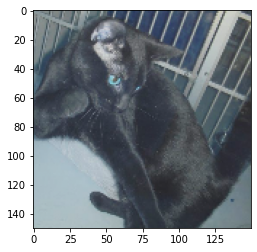

In [18]:
CATEGORIES = ["Cat","Dog"]
speciment = 2


prediction = model.predict(np.array([X[speciment]]))
prediction = prediction[0].tolist()

print(CATEGORIES[prediction.index(max(prediction))],f"  {max(prediction)}%\n")
plt.imshow(X[speciment])

In [14]:
import cv2

1/1 [==============================] - 2s 2s/step
[0.9998557567596436, 0.0001442202483303845]
Cat   99.98557567596436%



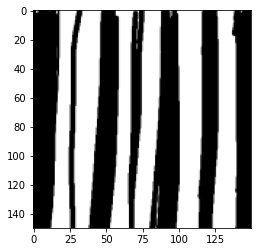

In [15]:
my_image = cv2.imread(r"11ded.png")
my_image = cv2.resize(my_image, (150, 150))
my_image = my_image/255

prediction = model.predict(np.array([my_image]))
prediction = prediction[0].tolist()
print(prediction)

print(CATEGORIES[prediction.index(max(prediction))],f"  {max(prediction) * 100}%\n")
plt.imshow(my_image)

In [19]:
#model.save(f"{NAME}_{epochs}epochs.h5")
print(f"{NAME}_{epochs}epochs.h5")

cat_vs_dogs_4c2_2n1687021208.6078448_40epochs.h5
